In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
titanic = pd.read_csv('C:/Users/user/Downloads/train.csv')

In [7]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic["Age"].mean()

29.69911764705882

In [9]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
titanic.groupby("Survived")['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [11]:
titanic.groupby(["Survived","Sex"])['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

In [12]:
titanic.groupby("Survived")['Age'].max()

Survived
0    74.0
1    80.0
Name: Age, dtype: float64

In [13]:
titanic.groupby("Survived")['Age'].min()

Survived
0    1.00
1    0.42
Name: Age, dtype: float64

In [14]:
titanic.groupby(["Survived","Sex"])['Age'].max()

Survived  Sex   
0         female    57.0
          male      74.0
1         female    63.0
          male      80.0
Name: Age, dtype: float64

In [15]:
titanic[titanic.Pclass == 2].Age

9      14.0
15     55.0
17      NaN
20     35.0
21     34.0
       ... 
866    27.0
874    28.0
880    25.0
883    28.0
886    27.0
Name: Age, Length: 184, dtype: float64

In [17]:
t = titanic.iloc[:,[2,5]]
t['Count'] = 1
t

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Age,Count
0,3,22.0,1
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,1
...,...,...,...
886,2,27.0,1
887,1,19.0,1
888,3,NaN,1
889,1,26.0,1


In [25]:
t1 = t.groupby(['Age']).sum()
t1

,Pclass,Count
Age,,
0.42,3,1
0.67,2,1
0.75,6,2
0.83,4,2
0.92,1,1
...,...,...
70.00,3,2
70.50,3,1
71.00,2,2


ValueError: `bins` must increase monotonically, when an array

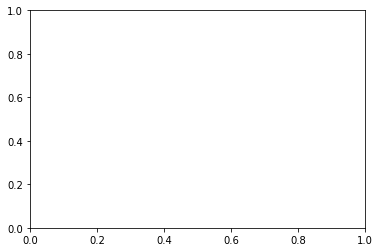

In [27]:
plt.hist(t1.index, t1.Count)

(0.42, 80.0)

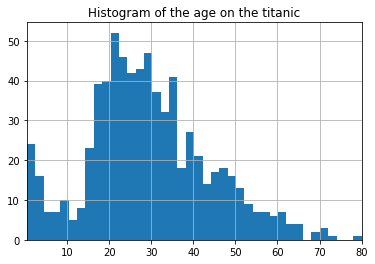

In [49]:
plt.hist(titanic.Age, bins = 40, label = 'Age')
plt.title('Histogram of the age on the titanic')
plt.grid(True)
plt.xlim(titanic.Age.min(),titanic.Age.max())


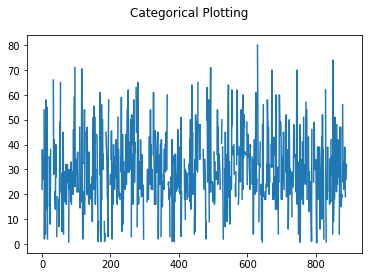

In [52]:
#plt.subplot(131)
#plt.bar(names, values)
#plt.subplot(132)
#plt.scatter(names, values)
#plt.subplot(133)
plt.plot(titanic.Age)
plt.suptitle('Categorical Plotting')
plt.show()

איך התפלג הגיל לכל מחלקה

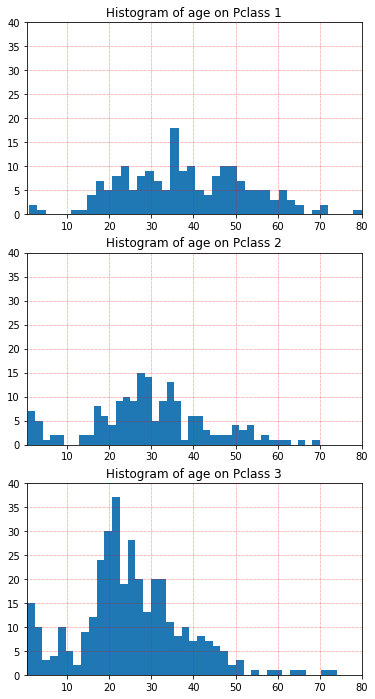

In [143]:
plt.figure(figsize=(6, 12))
for i in titanic.Pclass.unique():
    ax = plt.subplot(310+i)
    ax.set_title('Histogram of age on Pclass %0.f'%i)
    plt.hist(titanic[titanic.Pclass == i].Age, bins = 40)
    plt.xlim(titanic.Age.min(), titanic.Age.max())
    plt.ylim(0,40)
    plt.grid(color='r', linestyle=':', linewidth=0.5)

איך התפלג הגיל לכל מין

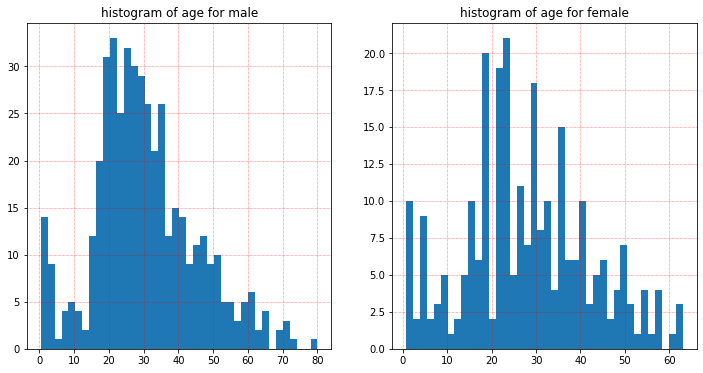

In [147]:
plt.figure(figsize=(12, 6))
j = 1
for i in titanic.Sex.unique():
    ax = plt.subplot(120+j)
    j = j+1
    ax.set_title('histogram of age for ' + i)
    plt.hist(titanic[titanic.Sex == i].Age, bins = 40)
    plt.grid(color='r', linestyle=':', linewidth=0.5)

כמה נהרגו בכל משפחה

In [210]:
fDeath = titanic.iloc[:,[1,3]]
fDeath

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,"Allen, Mr. William Henry"
...,...,...
886,0,"Montvila, Rev. Juozas"
887,1,"Graham, Miss. Margaret Edith"
888,0,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,"Behr, Mr. Karl Howell"


In [211]:
def first(x):
    y = x.split(',')
    return y[0]
fDeath.Name = fDeath.Name.agg(first)
fDeath.Name

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [223]:
fDeath.Survived = 1-fDeath.Survived

In [275]:
f = fDeath.groupby('Name').sum().sort_values('Survived',ascending = False)

In [277]:
f.head(23)

,Survived
Name,
Andersson,7
Sage,7
Panula,6
Skoog,6
Goodwin,6
Rice,5
Gustafsson,4
Palsson,4
Ford,4


(2.5, 7.5)

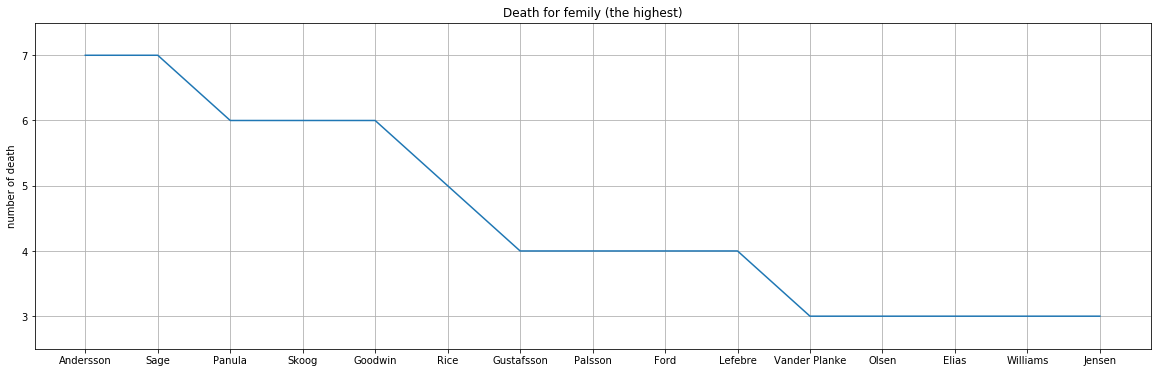

In [278]:
plt.figure(figsize=(20, 6))
plt.plot(f.head(15).index,f.head(15).Survived)
plt.grid(True)
plt.title('Death for femily (the highest)')
plt.ylabel('number of death')
plt.ylim(2.5,7.5)

## היחס בין ניצולים למתים בכל מחלקה

In [279]:
df = titanic.loc[:,['Survived','Pclass']]
df

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [310]:
s1 = df[df.Pclass == 1].Survived.sum()
n1 = (df.Pclass == 1).sum()
s2 = df[df.Pclass == 2].Survived.sum()
n2 = (df.Pclass == 2).sum()
s3 = df[df.Pclass == 3].Survived.sum()
n3 = (df.Pclass == 3).sum()

In [311]:
s1/n1

0.6296296296296297

([<matplotlib.patches.Wedge at 0x20f6e18eec8>,
 [Text(0.796254597444993, 0.7589325503941126, 'Survived'),
  Text(-0.7962545263885961, -0.758932624944845, 'died')],
 [Text(0.4343206895154507, 0.41396320930587954, '24.2%'),
  Text(-0.434320650757416, -0.4139632499699154, '75.8%')])

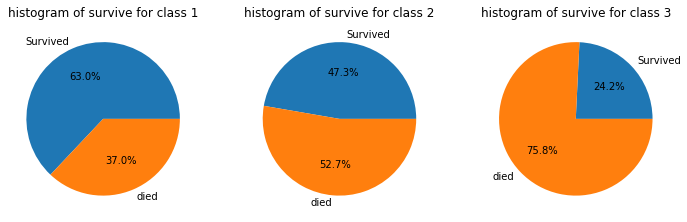

In [319]:
labels = 'Survived', 'died'
plt.figure(figsize=(12, 12))
ax = plt.subplot(331)
ax.set_title('histogram of survive for class 1')
plt.pie([s1/n1*1.8, (1-s1/n1)*1.8], labels = labels, autopct='%1.1f%%')
ax = plt.subplot(332)
ax.set_title('histogram of survive for class 2')
plt.pie([s2/n2*1.8, (1-s2/n2)*1.8], labels = labels, autopct='%1.1f%%')
ax = plt.subplot(333)
ax.set_title('histogram of survive for class 3')
plt.pie([s3/n3*1.8, (1-s3/n3)*1.8], labels = labels, autopct='%1.1f%%')

## קשר בין גיל למוות

In [322]:
import seaborn as sns

In [323]:
df = titanic.loc[:,['Survived','Age']]
df

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,0,NaN
889,1,26.0


In [324]:
df.corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


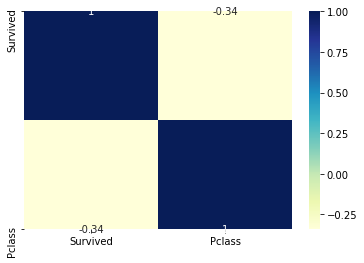

In [336]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

In [332]:
df = titanic.loc[:,['Survived','Pclass']]
df

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [333]:
df.corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


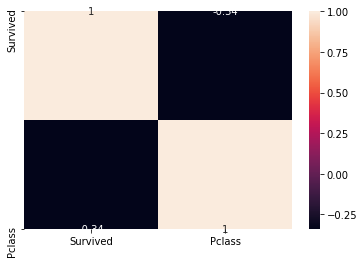

In [334]:
sns.heatmap(df.corr(), annot = True)